## WeatherPy

## Initialize

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

 # OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

## Get weather for cities at random coordinates

In [94]:
# The provided starter picked 1500 coordinate points, not knowing how many unique cities would result.
# This is a fragile approach because in a different situation, 1500 coordinate points could yield fewer than 500 cities.
# Instead, this continues to pick points until getting 500 unique cities.
# Furthermore, not all cities yielded by citipy are found at api.openweathermap.org
# We want to get 500 unique cities that are found at api.openweathermap.org

n_cities = 500
cities = []
weather = []
# Identify nearest city for each lat, lng combination
while len(cities) < n_cities:
    lat = np.random.uniform(low=-90.000, high=90.000)
    lng = np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        # Now is the time to see if api.openweathermap.org recognizes this city 
        url = base_url + "&q=" + city.city_name + ',' + city.country_code
        response = requests.get(url)
        if response.ok:
            cities.append(city)
            j = response.json()
            weather.append(j)
            # Include a print log of each city as it's being processed with the city number and city name.
            print(j['id'], j['name'], j['sys']['country'])

2075265 Busselton AU
1486910 Komsomolskiy RU
2110227 Butaritari KI
2155415 New Norfolk AU
3652764 Puerto Ayora EC
2163355 Hobart AU
3355672 Luderitz NA
3466307 Chapada dos Guimaraes BR
5576909 Evans US
463655 Zenzeli RU
2729907 Longyearbyen SJ
5367788 Lompoc US
4031574 Provideniya RU
3901903 Uyuni BO
3874787 Punta Arenas CL
6068416 Mayo CA
4032243 Vaini TO
471160 Voznesenye RU
1529195 Shihezi CN
2122090 Pevek RU
4407665 Kodiak US
2411397 Georgetown SH
2525392 Capaci IT
3393692 Itarema BR
2015306 Tiksi RU
546105 Nikolskoye RU
4252975 Barrow US
3833367 Ushuaia AR
286621 Salalah OM
5387494 Ridgecrest US
6170031 Tuktoyaktuk CA
4020109 Atuona PF
3465536 Corbelia BR
5871146 Palmer US
5699552 Sidney US
2016307 Solnechnyy RU
3366880 Hermanus ZA
5851349 Nanakuli US
1006984 East London ZA
2018735 Nyurba RU
3443061 Chuy UY
3128174 Bermeo ES
2123814 Leningradskiy RU
4030556 Rikitea PF
4036284 Alofi NU
1223738 Weligama LK
1014034 Carnarvon ZA
5905393 Bonavista CA
5859699 College US
4677008 Bryan US

3405924 Beberibe BR
513095 Palekh RU
2429296 Lai TD
2283016 Odienne CI
53157 Qandala SO
726629 Sungurlare BG
749795 Can TR
1298987 Pyinmana MM
2156643 Mount Gambier AU
2278158 Buchanan LR
2147756 Swan Hill AU
548302 Kirya RU
3995236 Mulege MX
2035601 Nenjiang CN
336454 Ginir ET
4167694 Panama City US
1174062 Kharan PK
215976 Ilebo CD
1498087 Nadym RU
4732862 Nome US
2022143 Khuzhir RU
4267710 Sitka US
305681 Kumluca TR
5710035 West Wendover US
538104 Kuvshinovo RU
2144528 Warrnambool AU
935051 Lavumisa SZ
3141982 Rena NO
3521972 Panaba MX
2012938 Yerofey Pavlovich RU
3981460 Coahuayana MX
217570 Buta CD
3474574 Palmas BR
751949 Ardesen TR
3385935 Tucurui BR
2562247 Marsaxlokk MT
1630662 Praya ID
1695702 Panan PH
1254709 Tezu IN
6138501 Saint-Augustin CA
2075720 Broome AU
3014334 Gueugnon FR
2027244 Bagdarin RU
2013465 Verkhoyansk RU
531257 Malaya Vishera RU
3460355 Jaciara BR
1178338 Gilgit PK
3034640 Bastia FR
1640902 Kawalu ID
2132606 Samarai PG
3407351 Araioses BR
2022773 Khandyga R

In [95]:
df = pd.DataFrame(weather)

In [96]:
df.head()

,base,clouds,cod,coord,dt,id,main,name,rain,sys,visibility,weather,wind
0,stations,{'all': 0},200,"{'lon': 115.35, 'lat': -33.64}",1529193270,2075265,"{'temp': 62.23, 'pressure': 1028.73, 'humidity...",Busselton,NaN,"{'message': 0.0045, 'country': 'AU', 'sunrise'...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 22.17, 'deg': 17.5013}"
1,stations,{'all': 68},200,"{'lon': 63.78, 'lat': 67.55}",1529193452,1486910,"{'temp': 39.46, 'pressure': 1009.04, 'humidity...",Komsomolskiy,NaN,"{'message': 0.0042, 'country': 'RU', 'sunrise'...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 13.22, 'deg': 32.0013}"
2,stations,{'all': 76},200,"{'lon': 172.79, 'lat': 3.07}",1529193397,2110227,"{'temp': 83.56, 'pressure': 1024.6, 'humidity'...",Butaritari,NaN,"{'message': 0.0035, 'country': 'KI', 'sunrise'...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 4.05, 'deg': 353.001}"
3,stations,{'all': 40},200,"{'lon': 147.06, 'lat': -42.78}",1529190000,2155415,"{'temp': 51.8, 'pressure': 1011, 'humidity': 8...",New Norfolk,NaN,"{'type': 1, 'id': 8195, 'message': 0.0031, 'co...",10000.0,"[{'id': 520, 'main': 'Rain', 'description': 'l...","{'speed': 14.99, 'deg': 200}"
4,stations,{'all': 75},200,"{'lon': -90.35, 'lat': -0.74}",1529190000,3652764,"{'temp': 77, 'pressure': 1011, 'humidity': 69,...",Puerto Ayora,NaN,"{'type': 1, 'id': 4355, 'message': 0.0042, 'co...",10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 16.11, 'deg': 130}"


In [97]:
len(df)

500

In [102]:
df.to_csv('weather_data.csv')

## Temperature (F) vs. Latitude

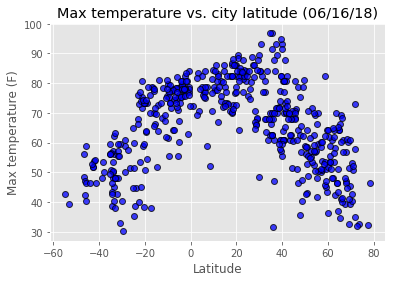

In [103]:
plt.style.use(['ggplot'])
lat = [x['lat'] for x in df['coord']]
temp_max = [x['temp_max'] for x in df['main']]
plt.scatter(lat, temp_max, c='b', alpha = 0.75, edgecolor = 'black', linewidths = 1)
plt.title ('Max temperature vs. city latitude (06/16/18)')
plt.xlabel ('Latitude')
plt.ylabel ('Max temperature (F)')
plt.savefig('max_temp_vs_lat.png', format='png')

## Humidity (%) vs. Lattitude

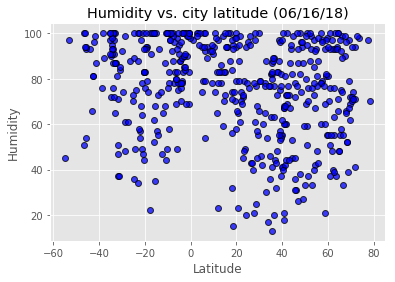

In [104]:
humidity = [x['humidity'] for x in df['main']]
plt.scatter(lat, humidity, c='b', alpha = 0.75, edgecolor = 'black', linewidths = 1)
plt.title ('Humidity vs. city latitude (06/16/18)')
plt.xlabel ('Latitude')
plt.ylabel ('Humidity')
plt.savefig('humidity_vs_lat.png', format='png')

## Cloudiness vs. Lattitude

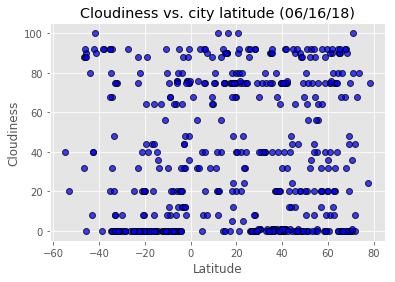

In [107]:
cloudiness = [list(x.values())[0] for x in df['clouds']]
plt.scatter(lat, cloudiness, c='b', alpha = 0.75, edgecolor = 'black', linewidths = 1)
plt.title ('Cloudiness vs. city latitude (06/16/18)')
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness')
plt.savefig('cloudiness_vs_lat.png', format='png')

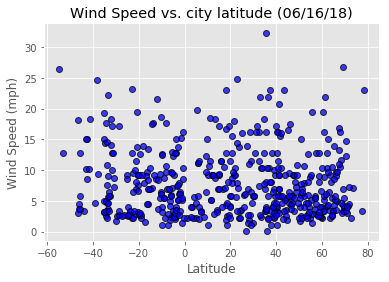

In [108]:
wind_speed = [x['speed'] for x in df['wind']]
plt.scatter(lat, wind_speed, c='b', alpha = 0.75, edgecolor = 'black', linewidths = 1)
plt.title ('Wind Speed vs. city latitude (06/16/18)')
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed (mph)')
plt.savefig('wind_speed_vs_lat.png', format='png')